<a href="https://colab.research.google.com/github/nguyenlykhanhlinh/Traffic_sign_classification/blob/main/Traffic_Sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/GTSRB/archive.zip -d /content/drive/MyDrive/Colab_Notebooks/GTSRB

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00010.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00011.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00012.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00013.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00014.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00015.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00016.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00017.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00018.png  
  inflating: /content/drive/MyDrive/Colab_Notebooks/GTSRB/train/5/00005_00053_00019.png  
  inflating: /content/drive/MyDrive/Colab_Noteboo

(39, 38, 3)


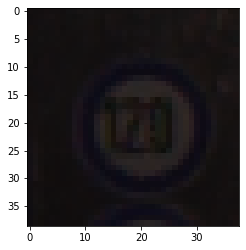

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/GTSRB/train/8/00008_00003_00014.png')

plt.imshow(img1, cmap = 'hot')
img_array = np.array(img1)
print(img_array.shape)


In [ ]:
data_dir = "/content/drive/MyDrive/Colab_Notebooks/GTSRB"

In [ ]:
import os

image_data = []
image_labels = []
total_class = 43
#The dataset has folders from 0–42 i.e. 43 classes
for i in range(total_class):
  path = os.path.join(data_dir,'train',str(i))
  images = os.listdir(path)
#iterating on all the images of the index folder
  for img in images:
    try:
      image = cv2.imread(path + '/'+ img)
      image = cv2.resize(image, (32,32))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      # image = np.array(image)
      image_data.append(image)
      label = np.zeros(total_class)
      label[i] = 1.0
      image_labels.append(label)
    except:
      print("Error loading image")

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 32, 32) (39209, 43)


Normalize

In [ ]:
X_train = np.array(image_data)/255
X_test = np.array(image_data)/255
print(X_train.shape)

(39209, 32, 32)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32) (7842, 32, 32) (31367, 43) (7842, 43)


Lấy ngẫu nhiên 25 ảnh

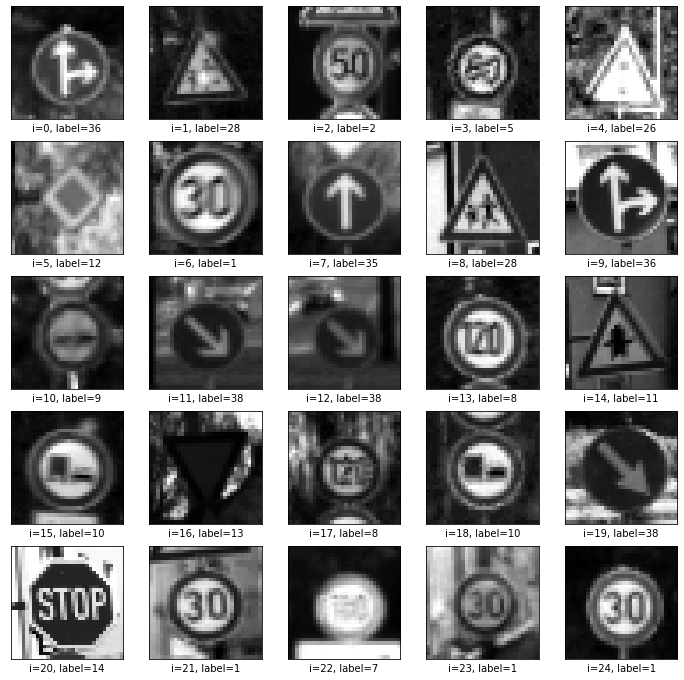

In [ ]:
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  label = np.argmax(y_train[start_index+i])

  plt.xlabel('i={}, label={}'.format(start_index+i, label))
  plt.imshow(X_train[start_index+i], cmap='gray')

plt.show()

Build model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#CNN
inp = Input(shape = (32,32,1))
cnn = Conv2D(filters = 32, kernel_size= 3, activation = 'relu')(inp)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.25)(pooling)

cnn = Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.25)(pooling)

# cnn = Conv2D(filters = 32, kernel_size= 2, activation = 'relu')(drop)
# pooling = MaxPooling2D(pool_size = (1,1))(cnn)
# drop = Dropout(0.25)(pooling)

f = Flatten()(drop)
fc1 = Dense(units=120, activation = 'relu')(f)
fc2 = Dense(units=120, activation = 'relu')(fc1)
out = Dense(units=43, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                         

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 64, epochs=20,
                    validation_data = (X_test, y_test))

Epoch 1/20
491/491 [==============================] - 16s 6ms/step - loss: 3.3402 - accuracy: 0.1673 - val_loss: 1.7662 - val_accuracy: 0.4731
Epoch 2/20
491/491 [==============================] - 2s 5ms/step - loss: 1.4387 - accuracy: 0.5717 - val_loss: 0.6462 - val_accuracy: 0.8011
Epoch 3/20
491/491 [==============================] - 2s 5ms/step - loss: 0.7803 - accuracy: 0.7636 - val_loss: 0.3264 - val_accuracy: 0.9082
Epoch 4/20
491/491 [==============================] - 2s 5ms/step - loss: 0.5279 - accuracy: 0.8405 - val_loss: 0.2008 - val_accuracy: 0.9440
Epoch 5/20
491/491 [==============================] - 2s 5ms/step - loss: 0.3938 - accuracy: 0.8828 - val_loss: 0.1548 - val_accuracy: 0.9572
Epoch 6/20
491/491 [==============================] - 2s 5ms/step - loss: 0.3408 - accuracy: 0.8986 - val_loss: 0.1119 - val_accuracy: 0.9749
Epoch 7/20
491/491 [==============================] - 2s 5ms/step - loss: 0.2832 - accuracy: 0.9157 - val_loss: 0.1140 - val_accuracy: 0.9681
Epoch

Visualizing the loss and val_loss

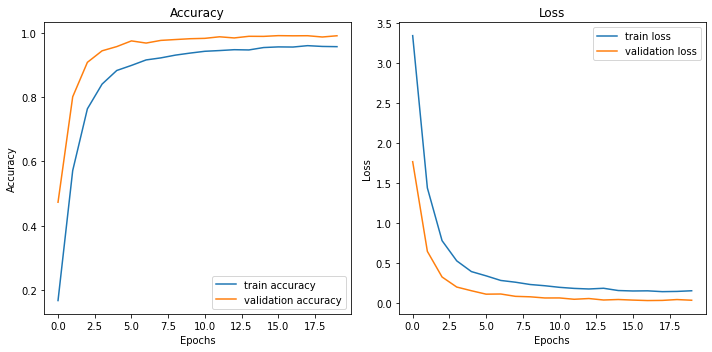

In [ ]:
# Figure size
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
# Plot loss and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Kiểm tra model với dữ liệu mới
model.evaluate(X_test, y_test)

246/246 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9908


[0.03612276166677475, 0.9908186793327332]

Test Image

In [ ]:
model.save('TrafficSign.h5')

(403, 576, 3)


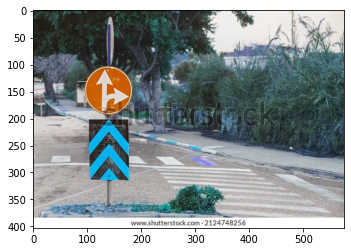

In [ ]:
#img_1
import cv2
img = cv2.imread('/content/P1.png')
print(img.shape)
plt.imshow(img)

(403, 576)


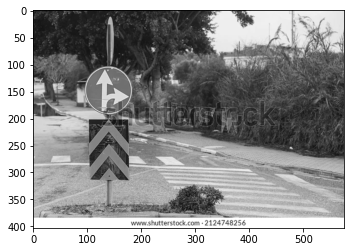

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap = 'gray')

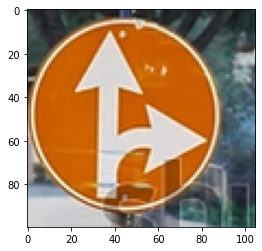

In [ ]:
crop_img = img[100:200, 95:200]
plt.imshow(crop_img, cmap = 'gray')

(32, 32)


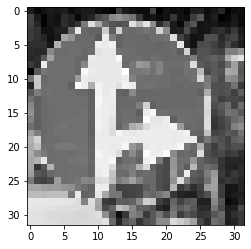

In [ ]:
new_img = cv2.resize(crop_img, (32,32))
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)
print(new_img.shape)
plt.imshow(new_img, cmap = 'gray')

In [ ]:
new_img.shape

(32, 32)

In [ ]:
a = np.array([new_img / 255])

In [ ]:
a

array([[[0.20392157, 0.1372549 , 0.17254902, ..., 0.11372549,
         0.15686275, 0.16078431],
        [0.32941176, 0.19607843, 0.1254902 , ..., 0.13333333,
         0.18431373, 0.14901961],
        [0.3254902 , 0.22745098, 0.11764706, ..., 0.16078431,
         0.19215686, 0.14509804],
        ...,
        [0.83529412, 0.83529412, 0.83137255, ..., 0.19607843,
         0.21176471, 0.34117647],
        [0.82352941, 0.81960784, 0.81568627, ..., 0.20392157,
         0.26666667, 0.29411765],
        [0.83137255, 0.83137255, 0.81568627, ..., 0.19607843,
         0.22745098, 0.29019608]]])

In [ ]:
print(a.shape)

(1, 32, 32)


In [ ]:
#load model
from tensorflow.keras.models import load_model
model = load_model('/content/TrafficSign.h5')
pred = model.predict(a)

In [ ]:
pred

array([[1.5547652e-03, 1.3250431e-02, 1.9878691e-02, 4.2738819e-01,
        7.9420684e-03, 1.9396375e-01, 8.8132711e-06, 1.0657189e-01,
        4.7936607e-02, 5.7974819e-02, 3.7974801e-02, 9.4754982e-04,
        7.3508187e-03, 4.8736348e-03, 1.3225336e-03, 3.9775288e-03,
        5.9513873e-03, 1.0490517e-02, 1.8726015e-03, 1.5871901e-04,
        1.2062708e-03, 3.6697512e-04, 7.8734638e-06, 5.8432668e-04,
        7.3271372e-07, 8.8530791e-04, 5.1279976e-03, 1.4154217e-05,
        2.6563226e-04, 9.2938782e-05, 4.4222884e-03, 2.0885926e-03,
        9.5795200e-04, 1.2977787e-02, 6.6861860e-05, 7.2306674e-04,
        4.1918264e-04, 2.4800154e-04, 4.9602296e-03, 4.8807214e-04,
        1.2662010e-02, 1.6344737e-05, 2.7264061e-05]], dtype=float32)

In [ ]:
np.argmax(pred)

3

Test_model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[4.79278259e-27, 3.84682735e-24, 3.48206617e-28, ...,
        5.50226967e-28, 0.00000000e+00, 0.00000000e+00],
       [4.75765827e-09, 4.15073664e-05, 3.61609273e-05, ...,
        8.44161605e-06, 3.78971854e-11, 2.68120466e-15],
       [2.74338752e-30, 1.31895587e-22, 1.24793185e-25, ...,
        1.66297472e-26, 1.20358154e-32, 5.74914385e-36],
       ...,
       [1.54526404e-03, 4.79613990e-03, 3.39403376e-03, ...,
        1.31201022e-03, 3.69999043e-07, 6.75164711e-06],
       [3.96019582e-15, 1.87713933e-09, 9.41524547e-09, ...,
        2.56084736e-08, 3.91085258e-21, 3.45043751e-11],
       [1.23010917e-24, 2.51417407e-21, 1.66051288e-21, ...,
        2.60925429e-15, 1.39670566e-14, 8.37989018e-16]], dtype=float32)

In [ ]:
y_test_new = np.argmax(y_test, axis = 1)

In [ ]:
y_test_new

array([26, 15, 13, ...,  8,  7, 20])

In [ ]:
y_test_pred  = np.argmax(y_pred, axis = 1)

In [ ]:
y_test_pred

array([26, 15, 13, ...,  8,  7, 20])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.99      0.99      0.99       496
           2       0.99      0.98      0.99       450
           3       1.00      0.96      0.98       280
           4       0.99      1.00      1.00       418
           5       0.95      0.99      0.97       364
           6       1.00      1.00      1.00        59
           7       0.99      0.99      0.99       278
           8       0.98      0.99      0.99       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       0.99      0.99      0.99       450
          13       1.00      1.00      1.00       452
          14       1.00      0.99      1.00       162
          15       0.98      1.00      0.99       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [ ]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


label 1


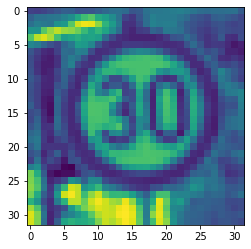

In [ ]:
i = np.random.randint(0,1000)
print("label" ,y_test_pred[i])
plt.imshow(X_test[i])